In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset as NetCDFFile

In [2]:
# import data directly from myria

fileURL = 'https://rest.myria.cs.washington.edu:1776/dataset/user-armbrustlab/program-seaflow/relation-abundance_div_TS/data?format=csv'
result = pd.read_csv(fileURL)
print(result.columns)

cruise = (pd.unique(result['Cruise']))
cc = len(cruise)
print cruise

Index([u'abundance', u'T', u'S', u'LON', u'LAT', u'Cruise', u'N0', u'J', u'H'], dtype='object')
['Tokyo_3' 'Thompson_10' 'Thompson_4' 'Tokyo_1' 'CMOP_3' 'Thompson_5'
 'Tokyo_4' 'Thompson_8' 'Thompson_0' 'MBARI_1' 'Thompson_9' 'Tokyo_2'
 'Thompson_12']


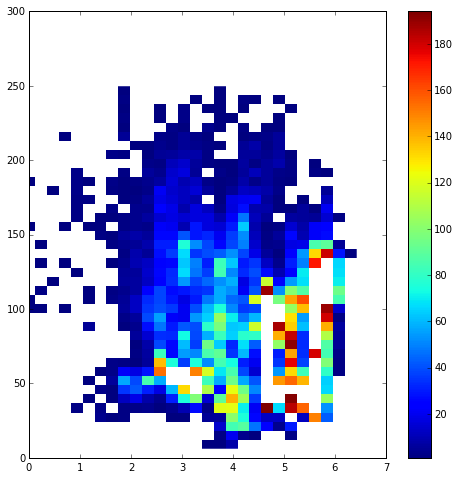

In [3]:
#subset = result[(result['Cruise']=="Thompson_8")]
#subset = result[(result['Cruise']!="Tokyo_1") | (result['Cruise']!="Tokyo_2") | (result['Cruise']!="Tokyo_3") | (result['Cruise']!="Tokyo_4")]

fig1 = plt.figure(1, figsize=(8,8))

plt.hist2d(np.log(result['abundance']),np.exp(result['H']), bins=40, cmap='jet',cmin=1, cmax=200)
plt.colorbar()
plt.axis([0,7,0,300])
plt.show()

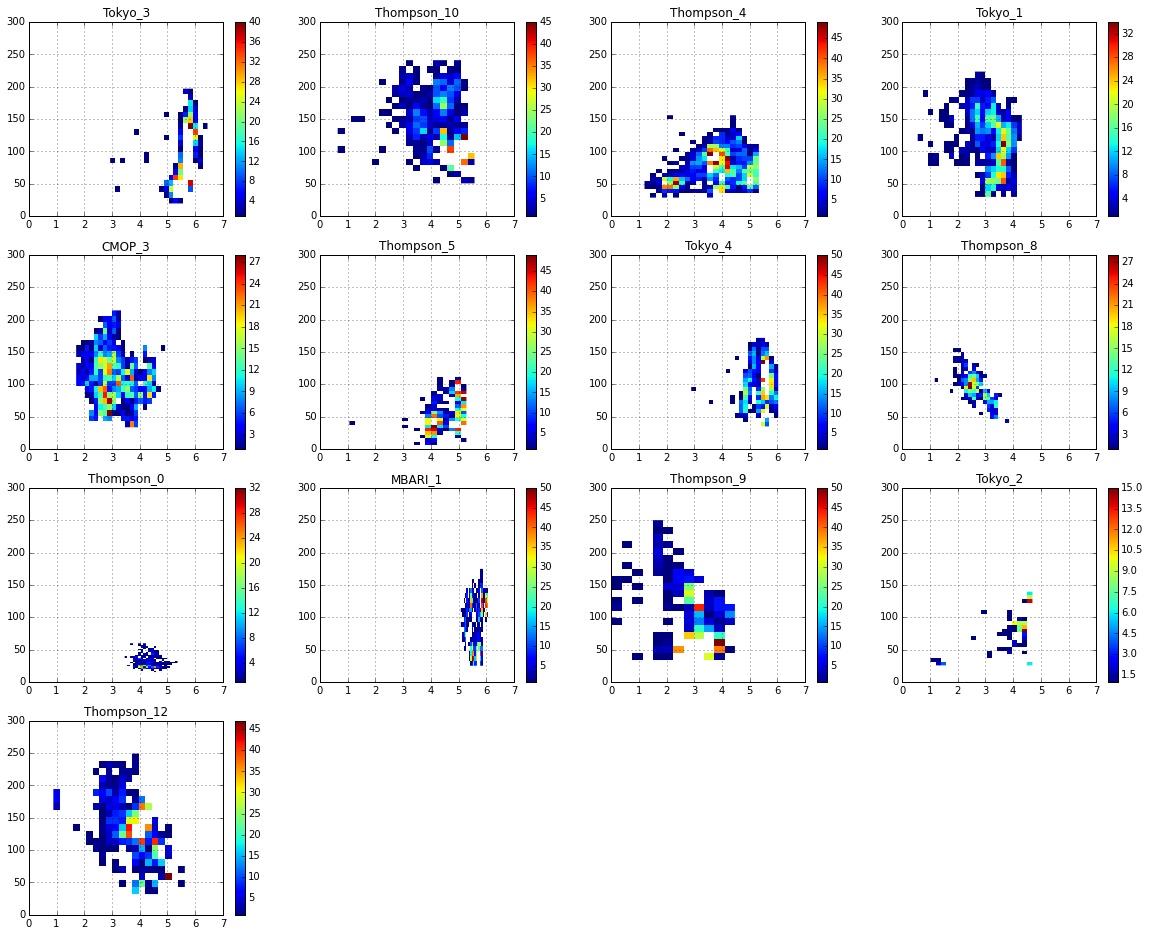

In [4]:
# pick the cruise that you want to plot the cytogram for

fig2 = plt.figure(2,figsize=(20,16))

for c in range(cc):
    bycruise = result[result['Cruise']==cruise[c]]

    x = np.log(bycruise['abundance'].values)
    y = np.exp(bycruise['H'].values)
     
    plt.subplot(4,4,c+1)
    plt.hist2d(x,y, bins=20, cmap='jet',cmin=1, cmax=50)
    plt.colorbar()
    #plt.plot(x,y,'.')
    plt.axis([0,7,0,300])
    plt.title(cruise[c])
    plt.grid(True)
plt.show()

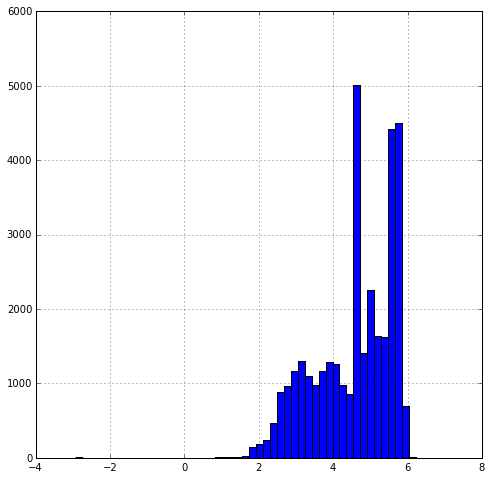

In [5]:
fig2 = plt.figure(2,figsize=(8,8))

plt.hist(np.log(result['abundance']), bins = 50)
plt.grid(True)
plt.show()

In [ ]:
plt.plot(